Планируется клиническое исследование для получения нового показания для препарата великолепнозумаб. Нозология – заболевание спектра оптиконевромиелита (ЗСОНМ). Основной исход – среднегодовая частота обострений (annualized relapse rate – ARR). Планируемый дизайн – проспективное когортное неконтролируемое исследование (однорукавное, т.к. орфанная нозология). Компаратор и период наблюдения для проведения скорректированного непрямого сравнения (СНС, или matching-adjusted indirect comparison – MAIC) без якоря определяли всем миром. Пусть будет инебилизумаб, горизонт оценки – 6 месяцев. Стат.гипотеза – неменьшая эффективность, эстиматор – incidence rate ratio (IRR), но вот никто не смог Вам сказать, какой же порог следует использовать для гипотезы неменьшей эффективности (non-inferiority margin). Так получилось, что запланирован набор ровно 100 пациентов (не меньше и не больше, пусть это будет условием задания). А вот сам список задач, стоящих перед Вами:
        

*   a. Предложить подход для определения порога неменьшей
эффективности и представить рассчитанное с его использованием значение.
*   b. Определить максимально допустимое число обострений в группе великолепнозумаба, при котором неменьшая эффективность по сравнению с инебилизумабом по ARR в 6 мес. с выбранным порогом неменьшей эффективности была бы доказана (вероятность ошибки I рода – 0,05).




Не переживайте, Вы не одни. Коллеги из отдела по-быстрому провели систематический поиск по всем правилам, и у Вас на руках есть датасет с выгрузкой РКИ с ЗОНСМ (файл task_3.1.xlsx). Вы чувствуете, что он очень пригодится для решения обеих задач.
По условиям задания Вы уже собаку съели в СНС без якоря и вспомнили подходящую методологию для сравнения. Если бы у вас уже были результаты КИ по великолепнозумабу, вы бы взяли данные пациентов (individual participant data - IPD) из него, описательные статистики по различным характеристикам пациентов, получавшим препарат-компаратор, опубликованные в некоторой статье (см.файл task_3.1.xlsx), и провели взвешивание популяции великолепнозумаба по средним значениям этих характеристик в популяции препарата-компаратора. Вы даже вспомнили про пакет R, который это все делает (мануал к нему лежит тут - task_3.2.pdf). Потом бы вы рассчитали взвешенный ARR для получавших великолепнозумаб и IRR c доверительным интервалом (ДИ), чтобы сравнить его с ARR для препарата-компаратора.
Список параметров популяции, по которым необходимо провести взвешивание, вам определил медицинский эксперт: возраст, пол, балл по EDSS в начале исследования.
Но пока КИ только планируется, и вместо его результатов у вас есть только характеристики целевой популяции для этого КИ: средний возраст 35 лет (станд.откл. 1,24 года); 75% женщин; средний балл EDSS 2,2 (станд.откл. 0,2 балла). Предполагается, что количественные признаки имеют нормальное распределение, а возраст, пол и средний балл EDSS являются независимыми.
Минимально возможное число обострений в когорте пациентов за период наблюдения в предполагаемом КИ = 1. Исходите из предположения, что все пациенты в КИ будут получать великолепнозумаб не менее 6 мес.

In [55]:
library(haven)
library(dplyr)
library(readxl)

In [56]:
file_path <- "/content/task_3.1.xlsx"
data_df <- read_excel(file_path, sheet = "data")
head(data_df)

TRIAL,ARM,N,ARR,se_logARR,mths,AGE,EDSS,FEMALE,ASIAN,AFRICAN,AQP4_POS
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Cree, 2019; Bennett, 2022",PLA,56,1.01,0.11,6,42.6,4.19,0.8928571,0.1428571,0.08928571,0.9285714
"Cree, 2019; Bennett, 2022",Inebilizumab,174,0.28,0.09,6,43.0,3.81,0.9137931,0.2241379,0.08620690,0.9252874
"Cree, 2019; Bennett, 2022",Inebilizumab,174,0.07,0.15,18,43.0,3.81,0.9137931,0.2241379,0.08620690,0.9252874
"Cree, 2019; Bennett, 2022",Inebilizumab,174,0.06,0.18,30,43.0,3.81,0.9137931,0.2241379,0.08620690,0.9252874
"Cree, 2019; Bennett, 2022",Inebilizumab,174,0.03,0.18,42,43.0,3.81,0.9137931,0.2241379,0.08620690,0.9252874
"Yamamura, 2019",PLA,42,0.32,0.25,33,43.4,3.63,0.9523810,0.4285714,0.04761905,0.6666667


In [57]:
# Фильтр по ARM = "Inebilizumab" и горизонту 6 мес.
compar_data <- data_df %>%
  filter(ARM == "Inebilizumab", mths == 6)

compar_data

TRIAL,ARM,N,ARR,se_logARR,mths,AGE,EDSS,FEMALE,ASIAN,AFRICAN,AQP4_POS
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Cree, 2019; Bennett, 2022",Inebilizumab,174,0.28,0.09,6,43,3.81,0.9137931,0.2241379,0.0862069,0.9252874


In [58]:
# Фильтр по горизонту 6 мес.
six_months_data <- data_df %>%
  filter(mths == 6)

six_months_data

TRIAL,ARM,N,ARR,se_logARR,mths,AGE,EDSS,FEMALE,ASIAN,AFRICAN,AQP4_POS
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Cree, 2019; Bennett, 2022",PLA,56,1.01,0.11,6,42.6,4.19,0.8928571,0.1428571,0.08928571,0.9285714
"Cree, 2019; Bennett, 2022",Inebilizumab,174,0.28,0.09,6,43.0,3.81,0.9137931,0.2241379,0.08620690,0.9252874


Задача 1: Порог неменьшей эффективности

Самый распространенный метод определения порога неменьшей эффективности - это метод сохранения доли эффекта компаратора. Поскольку данные о превосходстве инебилизумаба над плацебо доступны, прежде всего используем этои метод. Попробуем установить порог таким образом, чтобы великолепнозумаб сохранил 50% эффекта инебилизумаба, поскольку нет других указаний.
Но использовать только стандартный метод расчета может быть слишком оптимистичным подходом, поэтому для проверки рассчитаем порог также методом M1 и далее будем использовать среднее двух значений.

In [76]:
arr_pla <- six_months_data %>%
  filter(ARM == "PLA") %>%
  pull(ARR)

arr_comp <- six_months_data %>%
  filter(ARM == "Inebilizumab") %>%
  pull(ARR)

irr <- arr_comp / arr_pla

nim_face <- 1 - 0.5 * (1 - irr)
nim_face

[1] 0.6386139

In [77]:
se_pla <- six_months_data %>%
  filter(ARM == "PLA") %>%
  pull(se_logARR)

se_comp <- six_months_data %>%
  filter(ARM == "Inebilizumab") %>%
  pull(se_logARR)

se_irr <- sqrt(se_pla^2 + se_comp^2)

ci_log <- log(irr) + c(-1.96, 1.96) * se_irr
ci_irr <- exp(ci_log)

lower_effect <- 1 - ci_irr[1]

nim_m1 <- 1 - 0.5 * lower_effect
nim_m1

[1] 0.6049122

In [80]:
nim_w <- mean(c(nim_face, nim_m1))
nim_w

[1] 0.621763

In [47]:
# Генерация данных пациентов (N=100)
set.seed(123)

# Параметры
n_patients <- 100
mean_age <- 35
sd_age <- 1.24
prop_female <- 0.75
mean_edss <- 2.2
sd_edss <- 0.2

adsl <- data.frame(
  USUBJID = paste0("P-", 1001:(1000 + n_patients)),  # Уникальные ID
  AGE = round(rnorm(n_patients, mean_age, sd_age), 1),  # Возраст (округление до 0.1)
  SEX = sample(c("F", "M"), n_patients, replace = TRUE, prob = c(prop_female, 1 - prop_female)),  # Пол
  EDSS = round(rnorm(n_patients, mean_edss, sd_edss), 1),  # EDSS (округление до 0.1)
  ARM = "VELIKOLEPNOZUMAB"  # Группа лечения
)

# Моделирование числа обострений (Poisson)
# Пусть ARR великолепнозумаба = 0.28 (за год), исходя из предположения, что великолепнозумаб равноэффективен компаратору
adsl$RELAPSE <- rpois(n_patients, lambda = 0.28 * 0.5)

In [3]:
head(adsl, 10)

,USUBJID,AGE,SEX,EDSS,ARM,RELAPSE
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>
1,P-1001,34.3,F,2.4,VELIKOLEPNOZUMAB,0
2,P-1002,34.7,M,2.4,VELIKOLEPNOZUMAB,0
3,P-1003,36.9,F,2.3,VELIKOLEPNOZUMAB,0
4,P-1004,35.1,F,2.0,VELIKOLEPNOZUMAB,0
5,P-1005,35.2,F,2.2,VELIKOLEPNOZUMAB,0
6,P-1006,37.1,M,2.1,VELIKOLEPNOZUMAB,0
7,P-1007,35.6,F,2.3,VELIKOLEPNOZUMAB,0
8,P-1008,33.4,F,2.1,VELIKOLEPNOZUMAB,0
9,P-1009,34.1,F,2.4,VELIKOLEPNOZUMAB,1


In [4]:
summary(adsl)

   USUBJID               AGE            SEX                 EDSS      
 Length:100         Min.   :32.10   Length:100         Min.   :1.900  
 Class :character   1st Qu.:34.40   Class :character   1st Qu.:2.100  
 Mode  :character   Median :35.10   Mode  :character   Median :2.200  
                    Mean   :35.11                      Mean   :2.202  
                    3rd Qu.:35.90                      3rd Qu.:2.300  
                    Max.   :37.70                      Max.   :2.800  
     ARM               RELAPSE    
 Length:100         Min.   :0.00  
 Class :character   1st Qu.:0.00  
 Mode  :character   Median :0.00  
                    Mean   :0.16  
                    3rd Qu.:0.00  
                    Max.   :1.00  

In [48]:
table(adsl$SEX)     # Распределение по полу


 F  M 
76 24 

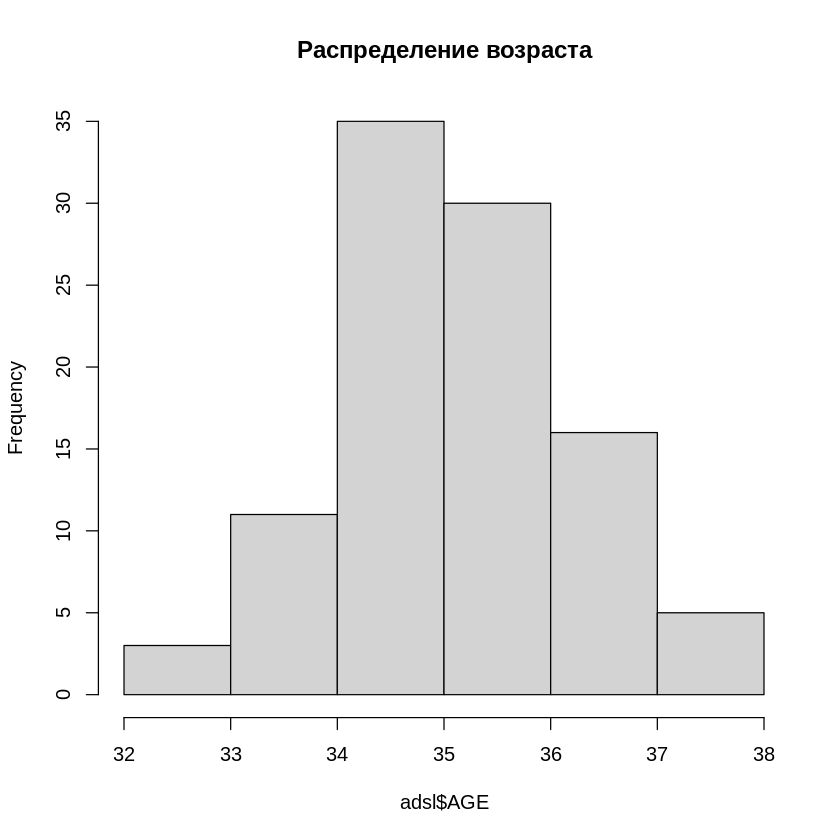

In [6]:
# Гистограмма возраста
hist(adsl$AGE, main = "Распределение возраста")

In [7]:
sd(adsl$AGE)      # Стандартное отклонение возраста

[1] 1.134564

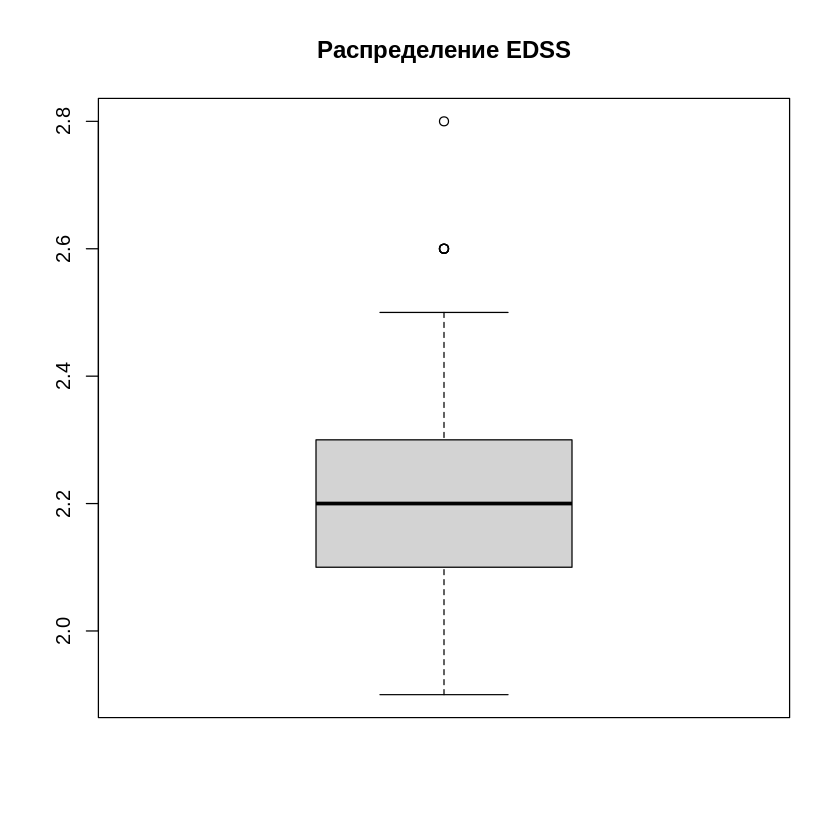

In [8]:
# Боксплот EDSS
boxplot(adsl$EDSS, main = "Распределение EDSS")

In [9]:
sd(adsl$EDSS)      # Стандартное отклонение EDSS

[1] 0.1874766

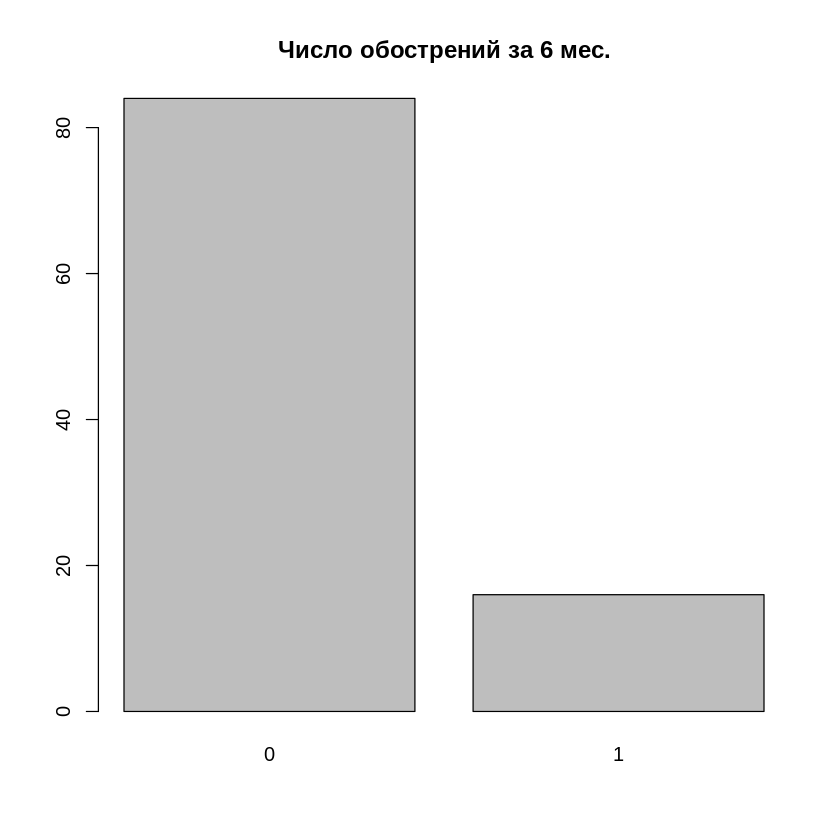

In [10]:
# График числа обострений
barplot(table(adsl$RELAPSE), main = "Число обострений за 6 мес.")

In [49]:
table(adsl$RELAPSE)    # Частота обострений


 0  1 
84 16 

In [50]:
str(adsl)


'data.frame':	100 obs. of  6 variables:
 $ USUBJID: chr  "P-1001" "P-1002" "P-1003" "P-1004" ...
 $ AGE    : num  34.3 34.7 36.9 35.1 35.2 37.1 35.6 33.4 34.1 34.4 ...
 $ SEX    : chr  "F" "M" "F" "F" ...
 $ EDSS   : num  2.4 2.4 2.3 2 2.2 2.1 2.3 2.1 2.4 2.1 ...
 $ ARM    : chr  "VELIKOLEPNOZUMAB" "VELIKOLEPNOZUMAB" "VELIKOLEPNOZUMAB" "VELIKOLEPNOZUMAB" ...
 $ RELAPSE: int  0 0 0 0 0 0 0 0 1 0 ...


In [51]:
adsl$FEMALE <- ifelse(adsl$SEX == "F", 1, 0)

In [14]:
adsl

USUBJID,AGE,SEX,EDSS,ARM,RELAPSE,FEMALE
<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<dbl>
P-1001,34.3,F,2.4,VELIKOLEPNOZUMAB,0,1
P-1002,34.7,M,2.4,VELIKOLEPNOZUMAB,0,0
P-1003,36.9,F,2.3,VELIKOLEPNOZUMAB,0,1
P-1004,35.1,F,2.0,VELIKOLEPNOZUMAB,0,1
P-1005,35.2,F,2.2,VELIKOLEPNOZUMAB,0,1
P-1006,37.1,M,2.1,VELIKOLEPNOZUMAB,0,0
P-1007,35.6,F,2.3,VELIKOLEPNOZUMAB,0,1
P-1008,33.4,F,2.1,VELIKOLEPNOZUMAB,0,1
P-1009,34.1,F,2.4,VELIKOLEPNOZUMAB,1,1


In [15]:
write.csv(adsl, "adsl_check.csv", row.names = FALSE)

In [52]:
# Сохранение в SAS-формат
write_xpt(adsl, "ADSL.sas7bdat")


In [81]:
spec <- data.frame(
  Variable = c("USUBJID", "AGE", "SEX", "EDSS", "ARM", "RELAPSE"),
  Label = c("Уникальный ID пациента", "Возраст (годы)", "Пол",
            "Балл по шкале EDSS", "Группа лечения", "Число обострений за 6 мес"),
  Type = c("Текст", "Число", "Категория", "Число", "Текст", "Целое число"),
  Values = c("Уникальная строка", "30–50", "M (мужской), F (женский)",
             "1.0–5.0", "VELIKOLEPNOZUMAB", "0, 1, 2, ..."),
  Missing = c("Нет", "Нет", "Нет", "Нет", "Нет", "Нет")
)

# Сохранение в CSV
write.csv(spec, "adsl_specification.csv", row.names = FALSE, fileEncoding = "UTF-8")

In [20]:
if (!require("devtools")) install.packages("devtools")
devtools::install_github("heorltd/maic")

Loading required package: devtools

Loading required package: usethis




rbibutils   (NA     -> 2.3        ) [CRAN]
Rdpack      (NA     -> 2.6.4      ) [CRAN]
RcppEigen   (NA     -> 0.3.4.0.2  ) [CRAN]
Rcpp        (1.0.14 -> 1.1.0      ) [CRAN]
reformulas  (NA     -> 0.4.1      ) [CRAN]
nloptr      (NA     -> 2.2.1      ) [CRAN]
minqa       (NA     -> 1.2.8      ) [CRAN]
gtools      (NA     -> 3.9.5      ) [CRAN]
numDeriv    (NA     -> 2016.8-1.1 ) [CRAN]
ucminf      (NA     -> 1.2.2      ) [CRAN]
ordinal     (NA     -> 2023.12-4.1) [CRAN]
lme4        (NA     -> 1.1-37     ) [CRAN]
iterators   (NA     -> 1.0.14     ) [CRAN]
jomo        (NA     -> 2.7-6      ) [CRAN]
pan         (NA     -> 1.9        ) [CRAN]
shape       (NA     -> 1.4.6.1    ) [CRAN]
foreach     (NA     -> 1.5.2      ) [CRAN]
mitml       (NA     -> 0.4-5      ) [CRAN]
glmnet      (NA     -> 4.1-9      ) [CRAN]
checkmate   (NA     -> 2.3.2      ) [CRAN]
Formula     (NA     -> 1.2-5      ) [CRAN]
colorspace  (NA     -> 2.1-1      ) [CRAN]
viridis     (NA     -> 0.6.5      ) [CRAN]
htmlTable  

Installing 30 packages: rbibutils, Rdpack, RcppEigen, Rcpp, reformulas, nloptr, minqa, gtools, numDeriv, ucminf, ordinal, lme4, iterators, jomo, pan, shape, foreach, mitml, glmnet, checkmate, Formula, colorspace, viridis, htmlTable, gridExtra, gdata, mice, Hmisc, weights, matrixStats

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp4DCSRa/remotesf4551dbbbc/heorltd-maic-ee31447/DESCRIPTION’ ... OK
* preparing ‘maic’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘maic_0.1.4.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
library(maic)

In [22]:
# Целевые значения
target <- list(
  AGE = compar_data$AGE,
  FEMALE = compar_data$FEMALE,
  EDSS = compar_data$EDSS
)

# Словарь
dictionary <- data.frame(
  match.id = c("age", "female", "edss"),
  target.variable = c("AGE", "FEMALE", "EDSS"),
  index.variable = c("AGE", "FEMALE", "EDSS"),
  match.type = c("mean", "proportion", "mean"),
  stringsAsFactors = FALSE
)


In [23]:
ip.mat <- createMAICInput(adsl,
                          target,
                          dictionary,
                          c("age", "female", "edss"))

wts <- maicWeight(ip.mat)

In [25]:
ip.mat

$n.adjustments
[1] 3

$n.matches
[1] 3

$excluded
  [1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE

$target.values
$target.values$age
[1] 43

$target.values$female
[1] 0.9137931

$target.values$edss
[1] 3.81


$input.matrix
         age     female  edss
  [1,]  -8.7  0.0862069 -1.41
  [2,]  -8.3 -0.9137931 -1.41
  [3,]  -6.1  0.0862069 -1.51
  [4,]  -7.9  0.0862069 -1.81
  [5,]  -7.8  0.08620

In [26]:
wts

  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [29]:
# Взвешивание
result <- maicMatching(
  index = adsl,
  target = target,
  dictionary = dictionary,
  matching.variables = c("age", "edss")
)

Warning message in wtd.var(x, weight, na.rm = TRUE):
“only one effective observation; variance estimate undefined”


ERROR: Error in sample.int(length(x), size, replace, prob): NA in probability vector


In [32]:
# Функция для оптимизации
maic_manual <- function(data, target) {
  # Инициализация
  X <- as.matrix(data[, names(target)])  # Матрица характеристик
  target_vec <- unlist(target)           # Вектор целевых значений

  # Целевая функция: минимизация дисперсии весов
  objective <- function(log_w) {
    w <- exp(log_w)                      # exp для гарантии w > 0
    weighted_mean <- colSums(X * w) / sum(w)
    sum((weighted_mean - target_vec)^2)  # Критерий близости к target
  }

  # Оптимизация (используем L-BFGS-B)
  opt <- optim(
    par = rep(0, nrow(X)),              # Начальные значения log(w)
    fn = objective,
    method = "BFGS"
  )

  # Возвращаем веса
  exp(opt$par) / mean(exp(opt$par))      # Нормализация
}

# Применяем к данным
weights <- maic_manual(adsl, target)
adsl$WEIGHT <- weights

In [33]:
adsl

USUBJID,AGE,SEX,EDSS,ARM,RELAPSE,FEMALE,WEIGHT
<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>
P-1001,34.3,F,2.4,VELIKOLEPNOZUMAB,0,1,8.225037e-37
P-1002,34.7,M,2.4,VELIKOLEPNOZUMAB,0,0,3.212438e-33
P-1003,36.9,F,2.3,VELIKOLEPNOZUMAB,0,1,1.141844e-09
P-1004,35.1,F,2.0,VELIKOLEPNOZUMAB,0,1,6.250081e-30
P-1005,35.2,F,2.2,VELIKOLEPNOZUMAB,0,1,1.589008e-28
P-1006,37.1,M,2.1,VELIKOLEPNOZUMAB,0,0,5.556166e-08
P-1007,35.6,F,2.3,VELIKOLEPNOZUMAB,0,1,3.190573e-24
P-1008,33.4,F,2.1,VELIKOLEPNOZUMAB,0,1,2.031619e-45
P-1009,34.1,F,2.4,VELIKOLEPNOZUMAB,1,1,1.179266e-38


In [34]:
cat("Возраст (взвешенный):", weighted.mean(adsl$AGE, adsl$WEIGHT), "\n")
cat("Доля женщин (взвешенная):", weighted.mean(adsl$FEMALE, adsl$WEIGHT), "\n")
cat("EDSS (взвешенный):", weighted.mean(adsl$EDSS, adsl$WEIGHT), "\n")

Возраст (взвешенный): 37.7 
Доля женщин (взвешенная): 0.5691513 
EDSS (взвешенный): 2.08617 


In [35]:
adsl$WEIGHT_MANUAL <- 1 / (1 + abs(adsl$AGE - compar_data$AGE) + abs(adsl$EDSS - compar_data$EDSS) + abs(adsl$FEMALE - compar_data$FEMALE))

In [36]:
adsl

USUBJID,AGE,SEX,EDSS,ARM,RELAPSE,FEMALE,WEIGHT,WEIGHT_MANUAL
<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>
P-1001,34.3,F,2.4,VELIKOLEPNOZUMAB,0,1,8.225037e-37,0.08931596
P-1002,34.7,M,2.4,VELIKOLEPNOZUMAB,0,0,3.212438e-33,0.08603044
P-1003,36.9,F,2.3,VELIKOLEPNOZUMAB,0,1,1.141844e-09,0.11499266
P-1004,35.1,F,2.0,VELIKOLEPNOZUMAB,0,1,6.250081e-30,0.09262512
P-1005,35.2,F,2.2,VELIKOLEPNOZUMAB,0,1,1.589008e-28,0.09527251
P-1006,37.1,M,2.1,VELIKOLEPNOZUMAB,0,0,5.556166e-08,0.10500018
P-1007,35.6,F,2.3,VELIKOLEPNOZUMAB,0,1,3.190573e-24,0.10003795
P-1008,33.4,F,2.1,VELIKOLEPNOZUMAB,0,1,2.031619e-45,0.08066984
P-1009,34.1,F,2.4,VELIKOLEPNOZUMAB,1,1,1.179266e-38,0.08774849


In [37]:
cat("Возраст (взвешенный):", weighted.mean(adsl$AGE, adsl$WEIGHT_MANUAL), "\n")
cat("Доля женщин (взвешенная):", weighted.mean(adsl$FEMALE, adsl$WEIGHT_MANUAL), "\n")
cat("EDSS (взвешенный):", weighted.mean(adsl$EDSS, adsl$WEIGHT_MANUAL), "\n")

Возраст (взвешенный): 35.22253 
Доля женщин (взвешенная): 0.7727337 
EDSS (взвешенный): 2.202301 


In [38]:
if (!require("WeightIt")) install.packages("WeightIt")
library(WeightIt)

Loading required package: WeightIt

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘WeightIt’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘cobalt’, ‘chk’, ‘sandwich’




In [39]:
weights_wi <- weightit(
  formula = FEMALE ~ AGE + EDSS,  # Указываем переменные для балансировки
  data = adsl,
  method = "ebal",               # Entropy Balancing
  targets = target,               # Целевые значения
  estimand = "ATE"               # Average Treatment Effect
)

In [40]:
adsl$WEIGHT_WI <- weights_wi$weights

In [ ]:
adsl

USUBJID,AGE,SEX,EDSS,ARM,RELAPSE,FEMALE,WEIGHT,WEIGHT_MANUAL,WEIGHT_WI
<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
P-1001,34.3,F,2.4,VELIKOLEPNOZUMAB,0,1,8.225037e-37,0.08931596,0.9831101
P-1002,34.7,M,2.4,VELIKOLEPNOZUMAB,0,0,3.212438e-33,0.08603044,1.0605907
P-1003,36.9,F,2.3,VELIKOLEPNOZUMAB,0,1,1.141844e-09,0.11499266,1.0154194
P-1004,35.1,F,2.0,VELIKOLEPNOZUMAB,0,1,6.250081e-30,0.09262512,1.0087257
P-1005,35.2,F,2.2,VELIKOLEPNOZUMAB,0,1,1.589008e-28,0.09527251,1.0012245
P-1006,37.1,M,2.1,VELIKOLEPNOZUMAB,0,0,5.556166e-08,0.10500018,0.9104917
P-1007,35.6,F,2.3,VELIKOLEPNOZUMAB,0,1,3.190573e-24,0.10003795,1.0012704
P-1008,33.4,F,2.1,VELIKOLEPNOZUMAB,0,1,2.031619e-45,0.08066984,0.9861631
P-1009,34.1,F,2.4,VELIKOLEPNOZUMAB,1,1,1.179266e-38,0.08774849,0.9809900


In [41]:
library(ggplot2)

# До взвешивания
unweighted_means <- c(
  AGE = mean(adsl$AGE),
  FEMALE = mean(adsl$FEMALE),
  EDSS = mean(adsl$EDSS)
)

# После взвешивания
weighted_means <- c(
  AGE = weighted.mean(adsl$AGE, adsl$WEIGHT_WI),
  FEMALE = weighted.mean(adsl$FEMALE, adsl$WEIGHT_WI),
  EDSS = weighted.mean(adsl$EDSS, adsl$WEIGHT_WI)
)

# Сравнение
data.frame(
  Variable = c("AGE", "FEMALE", "EDSS"),
  Unweighted = unweighted_means,
  Weighted = weighted_means,
  Target = target
)

,Variable,Unweighted,Weighted,Target.AGE,Target.FEMALE,Target.EDSS
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AGE,AGE,35.106,35.106,43,0.9137931,3.81
FEMALE,FEMALE,0.760,0.760,43,0.9137931,3.81
EDSS,EDSS,2.202,2.202,43,0.9137931,3.81


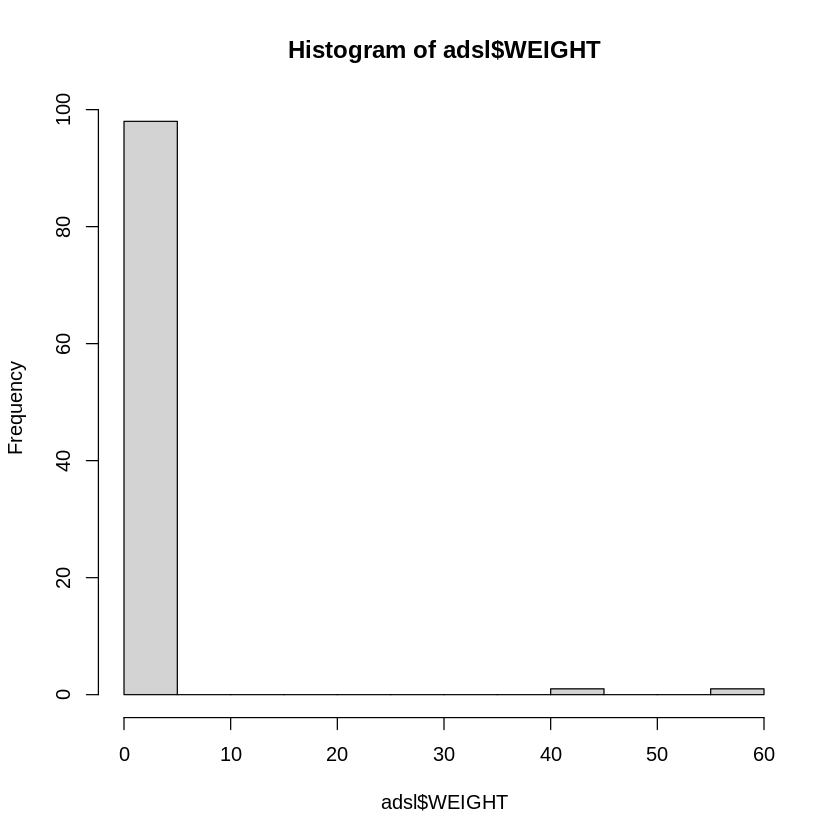

In [42]:
hist(adsl$WEIGHT, breaks=20)

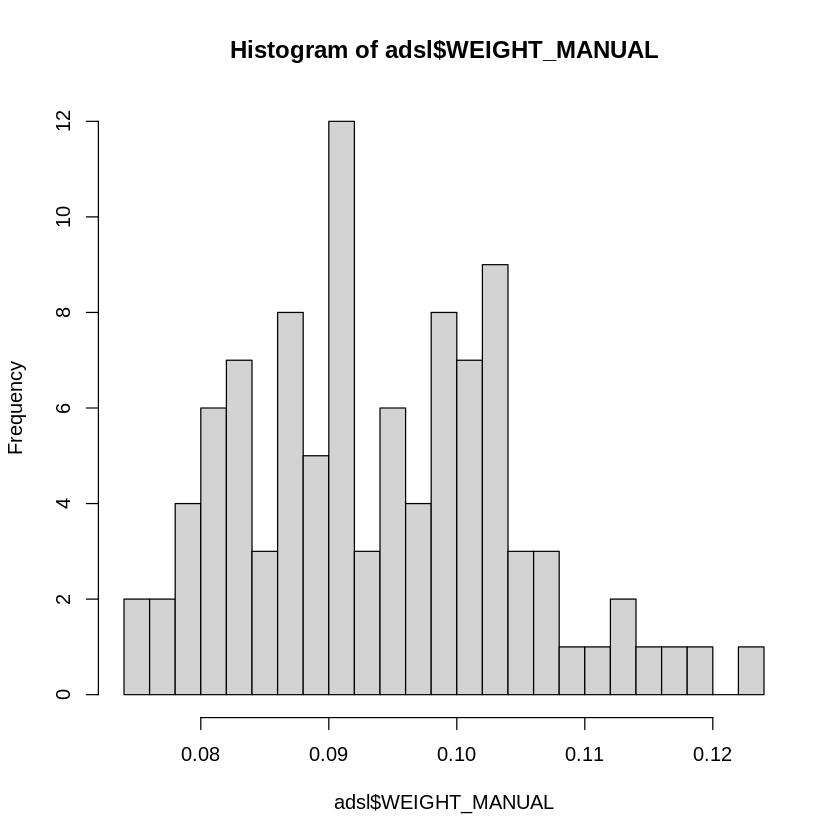

In [43]:
hist(adsl$WEIGHT_MANUAL, breaks=20)

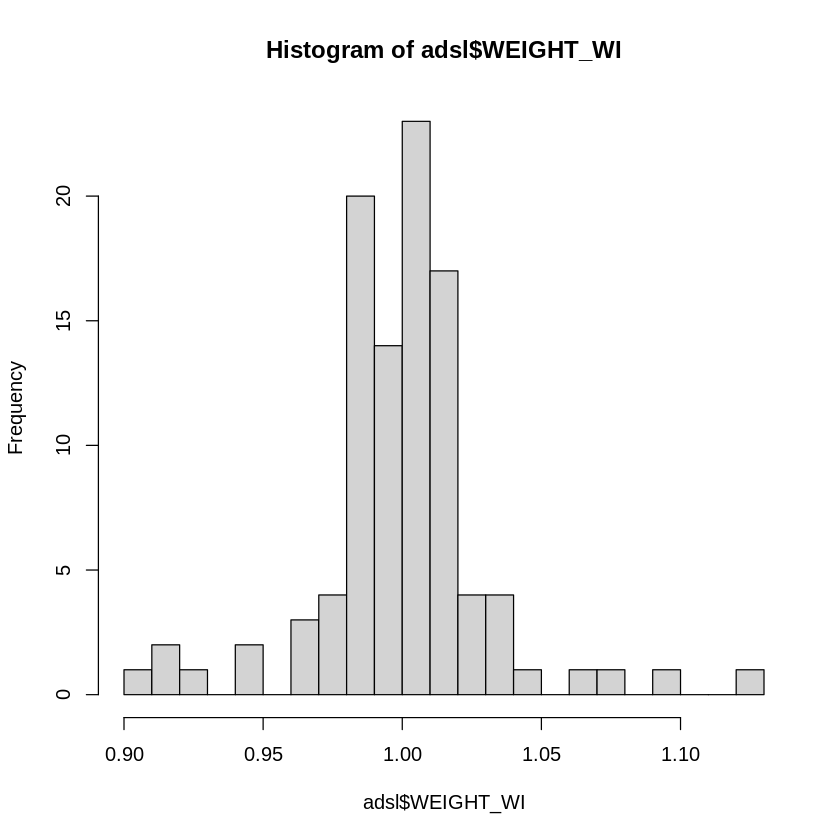

In [44]:
hist(adsl$WEIGHT_WI, breaks=20)

In [45]:
cor(adsl[, c("AGE", "EDSS")])

,AGE,EDSS
AGE,1.0000000,-0.1297006
EDSS,-0.1297006,1.0000000


In [46]:
model <- glm(RELAPSE ~ AGE + FEMALE + EDSS, data = adsl, family = poisson)
summary(model)  # Все переменные должны быть значимы (p < 0.05)


Call:
glm(formula = RELAPSE ~ AGE + FEMALE + EDSS, family = poisson, 
    data = adsl)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   3.0074     8.8376   0.340    0.734
AGE          -0.2595     0.2380  -1.090    0.276
FEMALE       -0.1130     0.5788  -0.195    0.845
EDSS          1.9236     1.2103   1.589    0.112

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 58.643  on 99  degrees of freedom
Residual deviance: 54.766  on 96  degrees of freedom
AIC: 94.766

Number of Fisher Scoring iterations: 6


Задача 2: Максимально допустимое число обострений

Ни одна из попыток взвешивания MAIC не увенчалась успехом, поскольку все значения, которые нер=обходимо балансировать, строго меньше целевого среднего - таким образом, задача оптимизации не имеет решения. Можно было бы попытаться сгенерировать датасет с характеристиками пациентов, более близкими к целевым значениям или вручную добавить к существующему датасему виртуальных пацентов с характеристиками, близкими к целевым.  
Поскольку взвешивание популяции великолепнозумаба по средним значениям целевых харакьеристик компаратора не удалось, определить максимально допустимое число обострений в группе великолепнозумаба, при котором неменьшая эффективность по сравнению с инебилизумабом по ARR в 6 мес. с выбранным порогом неменьшей эффективности была бы доказана, не представляется возможным.   

Для симуляции КИ неменьшей эффективности великолепнозумаба я бы использовала инструмент AnyLogic.